In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
x_train = pd.read_csv("./Train.csv", delimiter = ",").values

In [3]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(1600, 6)


In [4]:
y_train = x_train[:,-1]

In [5]:
x_train = x_train[:,:-1]

In [6]:
x_train.shape

(1600, 5)

In [7]:
bias = np.ones((x_train.shape[0],1))
print(bias.shape)

(1600, 1)


In [8]:
x_train = np.hstack((bias,x_train))
print(x_train.shape)

(1600, 6)


In [9]:
def hypothesis(x, theta):
    return np.dot(x,theta)

In [10]:
def error(x,y,theta):
    m = x.shape[0]
    hx = hypothesis(x,theta)
    error = np.sum((hx - y)**2)
    return error/m

In [11]:
def step_gradient(x,y,theta):
    
    n = x.shape[1]
    
    slope_m = np.zeros((n,))
    hx = hypothesis(x, theta)
    slope_m = np.dot(x.T,(hx - y ))  

    return slope_m

In [12]:
def gradient_descent(x,y,learning_rate = 0.0001, num_epoches = 100):
    
    n=x.shape[1]
    theta = np.zeros((n,))
    error_list = []
    for iter_ in range(num_epoches):
        e = error(x, y, theta)
        error_list.append(e)
        grad = step_gradient(x, y, theta)
        theta = theta - learning_rate*grad
    
    return theta, error_list

In [13]:
theta, error_list = gradient_descent(x_train, y_train)

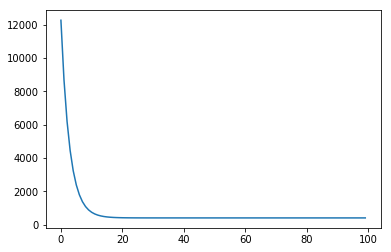

In [14]:
plt.plot(error_list)
plt.show()

In [15]:
theta

array([ 4.99096268, 29.68186906, 92.66247458,  8.28061616, 44.76773233,
        2.51915789])

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression()

In [18]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
reg.intercept_

4.9909667355749585

In [20]:
reg.coef_

array([ 0.        , 29.68187118, 92.66247759,  8.28062089, 44.76773522,
        2.51916121])